In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

In [131]:
nhis = pd.read_csv('../data/nhis_clean.csv') # Using cleaned NHIS dataset from Stanford CARE SRI
nhis1 = nhis.drop(['PPSU', 'PSTRAT', 'WTFA_SA', 'AHCSYR1', 'MD', 'RACE', 'MARITAL'], axis=1) # dropping unnecessary columns
nhis2 = nhis.loc[:, ['RACE', 'MARITAL']]
nhis.head()

,PPSU,PSTRAT,WTFA_SA,RACE,YEAR,AHCSYR1,EDUC,FAMINC,AGE,COVERAGE,...,STROKE,CANCER,LUNG,DIABETES,HYPERTENSION,DRINK,SMOKE,ASSIST,GMC,PLBORN
0,1,57,12440,NHW,2006,No,College Degree,<25K,18 ~ 25,Covered,...,No,No,No,No,No,Current,Current Occasional,No,No,Yes
1,1,284,6005,NHW,2006,No,High School Graduate/GED/Some College,+75K,45 ~ 64,Covered,...,No,No,No,No,No,Former,Never,No,Yes,Yes
2,2,282,6570,NHW,2006,No,Less Than High School,<10K,26 ~ 44,Not Covered,...,No,No,No,No,No,Current,Never,No,Yes,No
3,1,134,4856,NHW,2006,No,High School Graduate/GED/Some College,+75K,45 ~ 64,Covered,...,No,No,No,No,Yes,Current,Former,No,No,Yes
4,2,5,5390,NHW,2006,No,High School Graduate/GED/Some College,<25K,45 ~ 64,Not Covered,...,No,No,No,No,Yes,Current,Current Daily,No,No,Yes


## Preprocessing

In [134]:
def encode_binary(x):
    if x == 'Yes' or x == 'Male' or x == 'Covered':
        return 1
    else:
        return 0
    
binary_vars = [
    'SEX',
    'ASSIST',
    'COVERAGE', 
    'LIMIT', 
    'HEART', 
    'STROKE', 
    'CANCER', 
    'LUNG', 
    'DIABETES', 
    'HYPERTENSION',
    'GMC',
    'PLBORN'
]

for var in binary_vars:
    nhis1[var] = nhis1[var].map(encode_binary)

In [140]:
nhis2 = pd.get_dummies(nhis2)

In [136]:
age_dict = {
    '18 ~ 25': 1,
    '26 ~ 44': 2,
    '45 ~ 64': 3,
    '+65': 4
}
educ_dict = {
    'Less Than High School': 1,
    'High School Graduate/GED/Some College': 2,
    'College Degree': 3
}
faminc_dict = {
    '<10K': 1,
    '<25K': 2,
    '<45K': 3,
    '<75K': 4,
    '+75K': 5 
}
bmi_dict = {
    'Underweight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4
}
phstat_dict = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}
drink_dict = {
    'Current': 1,
    'Former': 2,
    'Never': 3
}
smoke_dict = {
    'Current Daily': 1,
    'Current Occasional': 2,
    'Former': 3,
    'Never': 4
}

nhis1['AGE'] = nhis['AGE'].map(age_dict)
nhis1['EDUC'] = nhis['EDUC'].map(educ_dict)
nhis1['FAMINC'] = nhis['FAMINC'].map(faminc_dict)
nhis1['BMI_CAT'] = nhis['BMI_CAT'].map(bmi_dict)
nhis1['PHSTAT'] = nhis['PHSTAT'].map(phstat_dict)
nhis1['DRINK'] = nhis['DRINK'].map(drink_dict)
nhis1['SMOKE'] = nhis['SMOKE'].map(smoke_dict)

In [138]:
nhis1.describe()

,YEAR,EDUC,FAMINC,AGE,COVERAGE,LIMIT,BMI_CAT,SEX,K6,PHSTAT,...,STROKE,CANCER,LUNG,DIABETES,HYPERTENSION,DRINK,SMOKE,ASSIST,GMC,PLBORN
count,381989.000000,379876.000000,381989.000000,381989.000000,381989.000000,381989.000000,381989.000000,381989.000000,372905.000000,381803.000000,...,381989.000000,381989.000000,381989.000000,381989.000000,381989.000000,375284.000000,379580.000000,381989.000000,381989.000000,381989.000000
mean,2012.280194,2.238309,3.358194,2.680548,0.849475,0.378341,2.968596,0.446298,2.607289,3.654832,...,0.032870,0.092997,0.019220,0.101291,0.329790,1.582927,3.276777,0.084675,0.678991,0.816170
std,3.531832,0.698840,1.341746,0.947546,0.357586,0.484974,0.898467,0.497108,3.982414,1.088712,...,0.178297,0.290429,0.137299,0.301714,0.470137,0.818764,1.054328,0.278398,0.466865,0.387346
min,2006.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2009.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000
50%,2012.000000,2.000000,3.000000,3.000000,1.000000,0.000000,3.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000
75%,2015.000000,3.000000,5.000000,3.000000,1.000000,1.000000,4.000000,1.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,1.000000,1.000000
max,2018.000000,3.000000,5.000000,4.000000,1.000000,1.000000,4.000000,1.000000,24.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [157]:
nhis = pd.concat([nhis1, nhis2], axis=1)
X = (nhis.drop('K6', axis=1)
     .fillna(0)
     .to_numpy())

In [163]:
y = pd.get_dummies(nhis['K6']).fillna(0).to_numpy()

In [173]:
X.shape
y.shape

(381989, 25)

## Model to Training

In [174]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(33, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [175]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [187]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=516,
                    validation_data=(X_test, y_test))

Train on 286491 samples, validate on 95498 samples
Epoch 1/20
286491/286491 [==============================] - 2s 6us/sample - loss: 2.5037 - acc: 0.3174 - val_loss: 3.7151 - val_acc: 0.0039
Epoch 2/20
286491/286491 [==============================] - 2s 6us/sample - loss: 2.5876 - acc: 0.3034 - val_loss: 3.0320 - val_acc: 0.4763
Epoch 3/20
286491/286491 [==============================] - 2s 6us/sample - loss: 2.6539 - acc: 0.2963 - val_loss: 2.7588 - val_acc: 0.1034
Epoch 4/20
286491/286491 [==============================] - 2s 6us/sample - loss: 2.6144 - acc: 0.2983 - val_loss: 2.6101 - val_acc: 0.0019
Epoch 5/20
286491/286491 [==============================] - 2s 5us/sample - loss: 2.6147 - acc: 0.2953 - val_loss: 4.0367 - val_acc: 0.0018
Epoch 6/20
286491/286491 [==============================] - 2s 6us/sample - loss: 2.5977 - acc: 0.2989 - val_loss: 2.5457 - val_acc: 0.1034
Epoch 7/20
286491/286491 [==============================] - 2s 6us/sample - loss: 2.6391 - acc: 0.2970 - val_

## Results

In [188]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [189]:
epochs = range(1, len(loss) + 1)

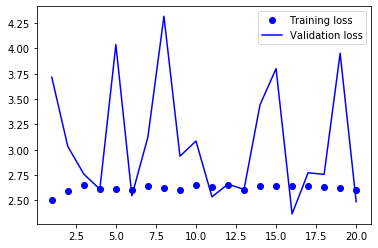

In [190]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

In [191]:
acc = history.history['acc']
val_acc = history.history['val_acc']

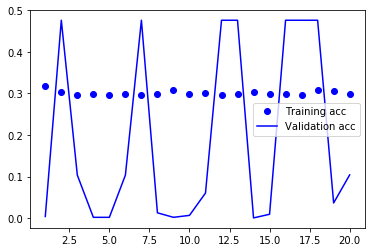

In [192]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

## Consideration
The validation loss is all over the place. There could be several reasons for this.
* Not enough features i.e. not enough information is embedded
* Inappropriate feature encoding
* Inappropriate network architecture
* Inappropriate loss function

**Next Steps**
* Search for academic literature using NHIS and Neural Networks
* Extract more features from the NHIS dataset
* Find appropriate loss function

**Notes**
* Instead of trying to predict the K6 scale itself, try to predict none, mild, moderate, or severe